# STAT207 Final Project - The Lasting Impact of Redlining

Sidharth Anand, Harish, Nicholas 

## 1. Introduction

The Home Owners Loan Corporation (HOLC) gives out neighborhood grades based on their analysis of the risk of defaulting on mortgage loans across the residents within said neighborhood. This grading was very useful for potential new homeowners and investors. However, the Home Owners Loan Corporation in the past had the practice of giving low neighborhood grades to neighborhoods with higher proportions of people of color compared to neighborhoods with higher proportions of caucasian neighborhoods, this is known as redlining. In many areas, redlining and discriminatory lending practices have lead to homeownership rates and wealth being comparably lower than non-minority communities. 

We decided to use the skills that we have gained in STAT 207: Data Science Exploration to investigate the relationship between demographic proportions and HOLC grading to see if there is any evidence of redlining’s lasting impact. Historically, redlining has been a practice that was used to segregate and isolate nieghborhoods, often by the ethnicity or race of the people living within a community. This practice has since been made illegal, however, its negative impact is still visible in today’s America. In our investigation, we want to determine whether there is any evidence that implies an association between HOLC grading, a metric describing the financial viability of region, and demographic proportions of neighborhoods in American metro areas that may be indicative of a lasting impact of redlining.  

References: 
https://www.investopedia.com/terms/r/redlining.asp

Dataset

The dataset that we used is an aggregation of population estimates based on different races and ethnicities in major American metro areas from 2020 and how they are different across various neighborhoods and communities with HOLC gradings ranging from A-D. The holc gradings were a metric used measure the finacial risk of loans and investing across different communities when redlining was a common practice in the 1930s. We are using this dataset to analyze how redlining practices have affected the distribution of various races and ethnicities in the regions that received the HOLC grade.  

Link: https://github.com/fivethirtyeight/data/tree/master/redlining 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import binom, bernoulli, norm
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import math
from scipy.stats import t, f
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('metro-grades.csv')

In [4]:
df['y'] = df['holc_grade'].map({'A':1, 'B': 1, 'C': 0, 'D': 0})

In [5]:
df[['pct_white', 'pct_black','pct_hisp', 'pct_asian', 'pct_other', 'surr_area_pct_white', 'surr_area_pct_black', 'surr_area_pct_hisp', 'surr_area_pct_asian', 'surr_area_pct_other']] = df[['pct_white', 'pct_black','pct_hisp', 'pct_asian', 'pct_other', 'surr_area_pct_white', 'surr_area_pct_black', 'surr_area_pct_hisp', 'surr_area_pct_asian', 'surr_area_pct_other']].multiply(0.01, axis="index")

In [6]:
df.head()

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other,y
0,"Akron, OH",A,24702,8624,956,688,1993,36963,0.6683,0.2333,...,70692,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,1
1,"Akron, OH",B,41531,16499,2208,3367,4211,67816,0.6124,0.2433,...,70692,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,1
2,"Akron, OH",C,73105,22847,3149,6291,7302,112694,0.6487,0.2027,...,70692,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,0
3,"Akron, OH",D,6179,6921,567,455,1022,15144,0.4080,0.4570,...,70692,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,0
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,0.7291,0.0780,...,68371,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,1


## 2. Descriptive Analytics

#### 1. What is the relationship between states and percent of Asians in this dataset?

2.1.1 Create a new column that has only states

In [7]:
df['state'] = df['metro_area'].str.split(',', expand = True)[1]
df

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other,y,state
0,"Akron, OH",A,24702,8624,956,688,1993,36963,0.6683,0.2333,...,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,1,OH
1,"Akron, OH",B,41531,16499,2208,3367,4211,67816,0.6124,0.2433,...,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,1,OH
2,"Akron, OH",C,73105,22847,3149,6291,7302,112694,0.6487,0.2027,...,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,0,OH
3,"Akron, OH",D,6179,6921,567,455,1022,15144,0.4080,0.4570,...,11037,17295,23839,0.7124,0.1655,0.0258,0.0405,0.0558,0,OH
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,0.7291,0.0780,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,1,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,"York-Hanover, PA",D,3449,2788,4794,96,634,11761,0.2932,0.2371,...,38586,7290,15634,0.7383,0.0815,0.1130,0.0213,0.0458,0,PA
547,"Youngstown-Warren-Boardman, OH-PA",A,4566,1962,426,68,361,7383,0.6184,0.2657,...,17687,2931,18410,0.7484,0.1469,0.0474,0.0079,0.0494,1,OH-PA
548,"Youngstown-Warren-Boardman, OH-PA",B,16173,6839,1475,175,1611,26273,0.6156,0.2603,...,17687,2931,18410,0.7484,0.1469,0.0474,0.0079,0.0494,1,OH-PA
549,"Youngstown-Warren-Boardman, OH-PA",C,32498,14924,4263,252,3631,55569,0.5848,0.2686,...,17687,2931,18410,0.7484,0.1469,0.0474,0.0079,0.0494,0,OH-PA


2.1.2 A new dataframe that has metro areas only from major states in each major region.

In [8]:
dfc = df[(df['state'] == ' IL') | (df['state'] == ' TX') | (df['state'] == ' FL') | (df['state'] == ' NY') | (df['state'] == ' CA')]
dfc

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other,y,state
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,0.7291,0.0780,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,1,NY
5,"Albany-Schenectady-Troy, NY",B,26644,7094,4334,2509,4650,45230,0.5891,0.1568,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,1,NY
6,"Albany-Schenectady-Troy, NY",C,56878,16795,10357,6355,11153,101538,0.5602,0.1654,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,0,NY
7,"Albany-Schenectady-Troy, NY",D,16806,19581,6688,2191,4364,49630,0.3386,0.3945,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,0,NY
16,"Amarillo, TX",A,6107,297,1687,215,622,8927,0.6841,0.0332,...,50830,4816,5556,0.4221,0.0878,0.4070,0.0386,0.0445,1,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,"Utica-Rome, NY",D,10159,3298,2941,2009,1041,19447,0.5224,0.1696,...,10332,9132,4598,0.6464,0.1118,0.1038,0.0917,0.0462,0,NY
523,"Waco, TX",A,1355,543,1286,10,104,3299,0.4108,0.1646,...,34059,1983,3314,0.3082,0.2334,0.3967,0.0231,0.0386,1,TX
524,"Waco, TX",B,5887,4300,10611,612,769,22179,0.2654,0.1939,...,34059,1983,3314,0.3082,0.2334,0.3967,0.0231,0.0386,1,TX
525,"Waco, TX",C,4263,2568,6355,396,457,14039,0.3036,0.1829,...,34059,1983,3314,0.3082,0.2334,0.3967,0.0231,0.0386,0,TX


2.1.3 Edit the dataframe so it only contains holc grade A

In [9]:
dfcg = dfc[dfc['holc_grade'] == 'A']
dfcg.head()

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other,y,state
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,0.7291,0.0780,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,1,NY
16,"Amarillo, TX",A,6107,297,1687,215,622,8927,0.6841,0.0332,...,50830,4816,5556,0.4221,0.0878,0.4070,0.0386,0.0445,1,TX
36,"Austin-Round Rock-Georgetown, TX",A,21180,591,3840,3073,1457,30142,0.7027,0.0196,...,48069,20005,12193,0.6277,0.0443,0.1964,0.0817,0.0498,1,TX
52,"Beaumont-Port Arthur, TX",A,899,5122,1660,106,170,7957,0.1129,0.6437,...,55440,8300,7206,0.4039,0.2979,0.2330,0.0349,0.0303,1,TX
56,"Binghamton, NY",A,2255,183,170,186,176,2970,0.7592,0.0615,...,9112,9003,8310,0.7393,0.0767,0.0634,0.0627,0.0578,1,NY


2.1.4 Choose metro areas that have similar total populations

In [10]:
dfcg = dfcg[(dfcg['metro_area'] == 'Springfield, IL') | (dfcg['metro_area'] == 'Buffalo-Cheektowaga, NY') | (dfcg['metro_area'] == 'San Antonio-New Braunfels, TX') | (dfcg['metro_area'] == 'Tampa-St. Petersburg-Clearwater, FL') | (dfcg['metro_area'] == 'San Diego-Chula Vista-Carlsbad, CA')]
dfcg

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other,y,state
72,"Buffalo-Cheektowaga, NY",A,15865,2173,969,640,908,20555,0.7718,0.1057,...,57521,45662,38171,0.6538,0.1720,0.0709,0.0563,0.0470,1,NY
416,"San Antonio-New Braunfels, TX",A,5588,377,12361,209,437,18972,0.2945,0.0199,...,390337,4276,9015,0.1436,0.0494,0.7805,0.0085,0.0180,1,TX
420,"San Diego-Chula Vista-Carlsbad, CA",A,14807,334,2676,939,1397,20152,0.7348,0.0166,...,407558,157305,79059,0.4090,0.0677,0.3313,0.1279,0.0643,1,CA
459,"Springfield, IL",A,4429,245,187,75,242,5178,0.8554,0.0472,...,2883,1542,5639,0.6336,0.2482,0.0339,0.0181,0.0663,1,IL
491,"Tampa-St. Petersburg-Clearwater, FL",A,8698,157,1079,297,430,10661,0.8159,0.0148,...,298272,52216,62888,0.5361,0.1448,0.2302,0.0403,0.0485,1,FL


2.1.5 Create a Histogram to show the realtionship between percent of Asian in A Grade Metro Areas From Each Major Region

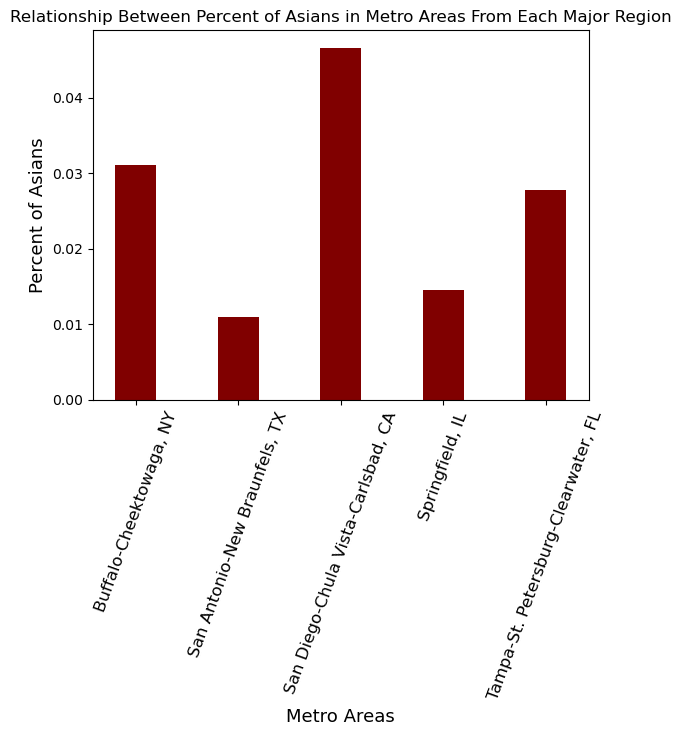

In [11]:
plt.bar(dfcg.metro_area, dfcg.pct_asian, width = 0.4, color = 'maroon')
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('Metro Areas', fontsize = 13)
plt.ylabel('Percent of Asians', fontsize = 13)
plt.title('Relationship Between Percent of Asians in Metro Areas From Each Major Region')
plt.show()

#### 2.2 How does the relationship between metro areas and the percentage of Asians change from different values of Holc Grade?

In [12]:
dfa = df[(df['state'] == ' IL') | (df['state'] == ' TX') | (df['state'] == ' FL') | (df['state'] == ' NY') | (df['state'] == ' CA')]
dfa

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other,y,state
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,0.7291,0.0780,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,1,NY
5,"Albany-Schenectady-Troy, NY",B,26644,7094,4334,2509,4650,45230,0.5891,0.1568,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,1,NY
6,"Albany-Schenectady-Troy, NY",C,56878,16795,10357,6355,11153,101538,0.5602,0.1654,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,0,NY
7,"Albany-Schenectady-Troy, NY",D,16806,19581,6688,2191,4364,49630,0.3386,0.3945,...,42699,41112,40596,0.6675,0.1179,0.0736,0.0709,0.0700,0,NY
16,"Amarillo, TX",A,6107,297,1687,215,622,8927,0.6841,0.0332,...,50830,4816,5556,0.4221,0.0878,0.4070,0.0386,0.0445,1,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,"Utica-Rome, NY",D,10159,3298,2941,2009,1041,19447,0.5224,0.1696,...,10332,9132,4598,0.6464,0.1118,0.1038,0.0917,0.0462,0,NY
523,"Waco, TX",A,1355,543,1286,10,104,3299,0.4108,0.1646,...,34059,1983,3314,0.3082,0.2334,0.3967,0.0231,0.0386,1,TX
524,"Waco, TX",B,5887,4300,10611,612,769,22179,0.2654,0.1939,...,34059,1983,3314,0.3082,0.2334,0.3967,0.0231,0.0386,1,TX
525,"Waco, TX",C,4263,2568,6355,396,457,14039,0.3036,0.1829,...,34059,1983,3314,0.3082,0.2334,0.3967,0.0231,0.0386,0,TX


In [13]:
dfcgt = dfa[(dfa['metro_area'] == 'Springfield, IL') | (dfa['metro_area'] == 'Buffalo-Cheektowaga, NY') | (dfa['metro_area'] == 'San Antonio-New Braunfels, TX') | (dfa['metro_area'] == 'Tampa-St. Petersburg-Clearwater, FL') | (dfa['metro_area'] == 'San Diego-Chula Vista-Carlsbad, CA')]
dfcgt

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,...,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other,y,state
72,"Buffalo-Cheektowaga, NY",A,15865,2173,969,640,908,20555,0.7718,0.1057,...,57521,45662,38171,0.6538,0.1720,0.0709,0.0563,0.0470,1,NY
73,"Buffalo-Cheektowaga, NY",B,80832,37858,11286,7797,7587,145360,0.5561,0.2604,...,57521,45662,38171,0.6538,0.1720,0.0709,0.0563,0.0470,1,NY
74,"Buffalo-Cheektowaga, NY",C,59609,53497,19055,12422,8350,152934,0.3898,0.3498,...,57521,45662,38171,0.6538,0.1720,0.0709,0.0563,0.0470,0,NY
75,"Buffalo-Cheektowaga, NY",D,4726,5175,2977,206,840,13924,0.3394,0.3717,...,57521,45662,38171,0.6538,0.1720,0.0709,0.0563,0.0470,0,NY
416,"San Antonio-New Braunfels, TX",A,5588,377,12361,209,437,18972,0.2945,0.0199,...,390337,4276,9015,0.1436,0.0494,0.7805,0.0085,0.0180,1,TX
417,"San Antonio-New Braunfels, TX",B,15862,1195,46005,548,1430,65040,0.2439,0.0184,...,390337,4276,9015,0.1436,0.0494,0.7805,0.0085,0.0180,1,TX
418,"San Antonio-New Braunfels, TX",C,8610,2009,92951,540,1252,105362,0.0817,0.0191,...,390337,4276,9015,0.1436,0.0494,0.7805,0.0085,0.0180,0,TX
419,"San Antonio-New Braunfels, TX",D,7057,5540,69962,446,1212,84218,0.0838,0.0658,...,390337,4276,9015,0.1436,0.0494,0.7805,0.0085,0.0180,0,TX
420,"San Diego-Chula Vista-Carlsbad, CA",A,14807,334,2676,939,1397,20152,0.7348,0.0166,...,407558,157305,79059,0.4090,0.0677,0.3313,0.1279,0.0643,1,CA
421,"San Diego-Chula Vista-Carlsbad, CA",B,48240,1952,12656,4150,5125,72122,0.6689,0.0271,...,407558,157305,79059,0.4090,0.0677,0.3313,0.1279,0.0643,1,CA


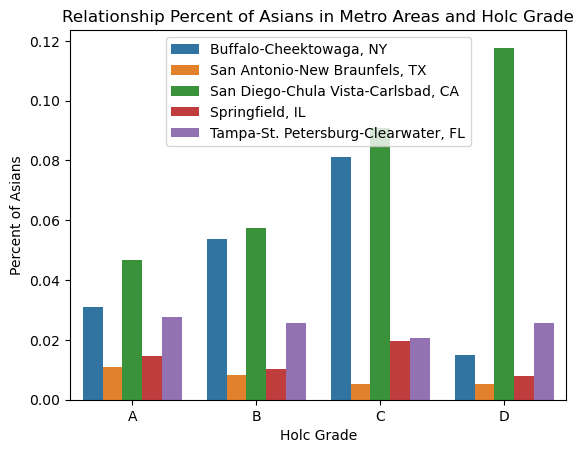

In [14]:
temp = dfcgt[['holc_grade','metro_area', 'pct_asian']].groupby([ 'holc_grade','metro_area']).agg("sum").reset_index()
ax = sns.barplot(data=temp,x="holc_grade",y="pct_asian",hue="metro_area")
ax.set(xlabel='Holc Grade',
       ylabel='Percent of Asians',
       title='Relationship Percent of Asians in Metro Areas and Holc Grade')
plt.legend(loc='upper center')
plt.show()

## 3. Inference

1.
This analysis aims to answer two questions: 

    Is there sufficient evidence to suggest that there is an association between the percentage of Caucasians within a metropolitan and the HOLC grade given to a metropolitan area?

    Is there sufficient evidence to suggest that there is an association between the percentage of Caucasians in the surrounding area of a metropolitan and the HOLC grade given to a metropolitan area?



2.
 Explain why/how you chose your response variable(s) and your explanatory variable(s) 
that you are exploring in this question

I chose percent of a white people as my explanatory variable and holc_grade as my response variable. Since redlining is a practice that is racially discriminatory towards people of color, it would not be irrational to make the assumption that higher percentage Caucasians could be an indicator of metropolitan areas that maybe influenced by previous redlining policies. The most obvious impact of redlining is the grade assigned to metropolitan areas as such I used holc_grade as my response variable. Since holc_grade is not a binary categorical variable, we have decided to classify metro areas with grades of A and B as "good",  metro areas with grades of C and D as "Bad". Using the column y and representing good as 1 and bad as 0.

 3a. Make sure you state your hypotheses. 
   
      My Hypotheses are:
 
   $\begin{equation}\mu_{PosMetroSurrCauPct} - \mu_{NegMetroSurrCauPct} = 0 \end{equation}$
   $\begin{equation}\mu_{PosMetroCauPct} - \mu_{NegMetroCauPct} = 0\end{equation}$


Finally, in the conclusion part of this section clearly discuss how your hypothesis test conclusion answers your research question


Preprocessing

In [15]:
df_g = df[df["y"] == 1]
df_b = df[df["y"] == 0]
print(df_g.head())
print(df_b.head())

                          metro_area holc_grade  white_pop  black_pop  \
0                          Akron, OH          A      24702       8624   
1                          Akron, OH          B      41531      16499   
4        Albany-Schenectady-Troy, NY          A      16989       1818   
5        Albany-Schenectady-Troy, NY          B      26644       7094   
8  Allentown-Bethlehem-Easton, PA-NJ          A       1076         71   

   hisp_pop  asian_pop  other_pop  total_pop  pct_white  pct_black  ...  \
0       956        688       1993      36963     0.6683     0.2333  ...   
1      2208       3367       4211      67816     0.6124     0.2433  ...   
4      1317       1998       1182      23303     0.7291     0.0780  ...   
5      4334       2509       4650      45230     0.5891     0.1568  ...   
8       367         21         82       1616     0.6656     0.0438  ...   

   surr_area_hisp_pop  surr_area_asian_pop  surr_area_other_pop  \
0               11037                17295 

Descriptive Statistics

In [16]:
pop_white_pct_avg_g = df_g["pct_white"].mean()
pop_white_pct_sd_g = df_g["pct_white"].std()
print("Average Percentage of White population within a 'Good' metro area: " + str(pop_white_pct_avg_g) 
      + "\nSD Percentage of White population within a 'Good' metro area: " + str(pop_white_pct_sd_g) + "\n")

pop_white_pct_avg_b = df_b["pct_white"].mean()
pop_white_pct_sd_b = df_b["pct_white"].std()
print("Average Percentage of White population within a 'Bad' metro area: "  + str(pop_white_pct_avg_b) 
      + "\nSD Percentage of White population within a 'Bad' metro area: " + str(pop_white_pct_sd_b) + "\n")

surr_white_pct_avg_g = df_g["surr_area_pct_white"].mean()
surr_white_pct_sd_g = df_g["surr_area_pct_white"].std()
print("Average Percentage of White population in the Surrounding area of White population graded as 'Good': : " + str(surr_white_pct_avg_g) 
      + "\nSD Percentage of White population in the Surrounding area of White population graded as 'Good': " + str(surr_white_pct_sd_g) + "\n")

surr_white_pct_avg_b = df_b["surr_area_pct_white"].mean()
surr_white_pct_sd_b = df_b["surr_area_pct_white"].std()
print("Average Percentage of White population in the Surrounding area of White population graded as 'Bad': : "  + str(surr_white_pct_avg_b) 
      + "\nSD Percentage of White population in the Surrounding area of White population graded as 'Bad': : " + str(surr_white_pct_sd_b))

Average Percentage of White population within a 'Good' metro area: 0.668575
SD Percentage of White population within a 'Good' metro area: 0.1796528662575286

Average Percentage of White population within a 'Bad' metro area: 0.44005927272727274
SD Percentage of White population within a 'Bad' metro area: 0.20683033707663775

Average Percentage of White population in the Surrounding area of White population graded as 'Good': : 0.5480659420289856
SD Percentage of White population in the Surrounding area of White population graded as 'Good': 0.17362388168216406

Average Percentage of White population in the Surrounding area of White population graded as 'Bad': : 0.5473985454545455
SD Percentage of White population in the Surrounding area of White population graded as 'Bad': : 0.17358538927611206


3b. Make sure you check your conditions for this hypothesis test(s) 

The dataset metro-grades.csv will act as the sample for the inference as the dataset can be viewed as a sample of all metropolitan areas in North America. Although we do acknowledge that cultural, socio-economic factors and other possible confounding variables may influence how metropolitan areas are rated across North America, we will proceed with caution and use this dataset as a sample for inference. 

The sample is not completely random as there are 4 observations for each city due to the four types of HOLC grading given. As such this fails the condition for independent samples. As for the less than 10% condition, this dataset meets this condition as there are more metropolitan areas in the world than 5000. The sample also meets the greater than 30 observations condition. Due to the sample meeting 2 of the three conditions for inference, we will continue to proceed with caution

3c. Calculate a p-value (or confidence interval) for this hypothesis test and use it to state your conclusion. 

Confidence Interval (Q1)

In [17]:
white_avg_diff_hi = ((pop_white_pct_avg_g - pop_white_pct_avg_b ) + 
                    (norm.ppf(0.975) * (math.sqrt( ((pop_white_pct_sd_g **2) / len(df_g)) 
                                                  + ((pop_white_pct_sd_b  **2) / len(df_b))))))
white_avg_diff_hi

0.26086987025878733

In [18]:
white_avg_diff_lo = ((pop_white_pct_avg_g - pop_white_pct_avg_b) - 
                    (norm.ppf(0.975) * (math.sqrt( ((pop_white_pct_sd_g **2) / len(df_g)) 
                                                  + ((pop_white_pct_sd_b  **2) / len(df_b))))))
white_avg_diff_lo

0.19616158428666725

In [19]:
conf_interval_q1 = [white_avg_diff_lo,white_avg_diff_hi]
conf_interval_q1

[0.19616158428666725, 0.26086987025878733]

Based on the results of the confidence interval, we are 95% confident that for this sample, the mean of percentage of white populations in metropolitan areas across North America is between 19.6% and 26.1%. As such there is enough evidence to reject the hypothesis that the average percentage difference between metropolitan areas rated as "good" and metropolitan areas rated as "bad" is zero. This suggests that there maybe an association with proportion of white within a metropolitan area and the grade given to a metropolitan area.

Confidence Interval (Q2)

In [20]:
surr_white_avg_diff_hi = ((surr_white_pct_avg_g - surr_white_pct_avg_b ) + 
                    (norm.ppf(0.975) * (math.sqrt( ((surr_white_pct_sd_g **2) / len(df_g)) 
                                                  + ((surr_white_pct_sd_b  **2) / len(df_b))))))
surr_white_avg_diff_hi

0.029658465938776406

In [21]:
surr_white_avg_diff_lo = ((surr_white_pct_avg_g - surr_white_pct_avg_b) - 
                    (norm.ppf(0.975) * (math.sqrt( ((surr_white_pct_sd_g **2) / len(df_g)) 
                                                  + ((surr_white_pct_sd_b  **2) / len(df_b))))))
surr_white_avg_diff_lo

-0.028323672789896108

In [22]:
conf_interval_q2 = [surr_white_avg_diff_lo,surr_white_avg_diff_hi]
conf_interval_q2

[-0.028323672789896108, 0.029658465938776406]

The results from this confidence interval seems to suggest that there maybe no association with the percent of white population in the surrounding area of a metropolitan area and the grade given to a metropolitan area as the confidence interval includes zero which means that there is not suffcient evidence to reject the hypothesis that the percentage difference is 0.

4. Finally, in the conclusion part of this section clearly discuss how your hypothesis test 
conclusion answers your research question.

The first hypothesis test's conclusion answers that there is suffcient evidence to suggest there is an association with the percentage of caucasians in a metro area and the grade given to a metro area as 0 was not included in the confidence interval which meant that there was enough evidence to suggest that the difference in the average percentage of caucasians in a metro area graded as "good" is not equaL to the average percentage of caucasians in a metro area graded as "bad". 

The second hypothesis test answers that there is not suffcient evidence to suggest there is an association with the percentage of caucasians in the surrounding area of a metro area and the grade given to a metro area as 0 was included in the confidence interval which meant that there was not enough evidence to suggest that the difference in the average percentage of caucasians in the surrounding area of a metro area graded as "good" is not equaL to the average percentage of caucasians in the surrounding area of a metro area graded as "bad". 

## 4. Linear Regression

#### For Research Question 1

Is there a linear relationship between the white population and the black population, hispanic population, asian population, other population, and holc grade in the sample? 


Model Fitting

In this model, we chose to use the holc grade, black population, hispanic population, asian population, and other population as the explanatory variables to predict the white population. We chose these explanatory variable since they are most pertinent to our investigation goal and are the strongest variables that related most to the hold_grade. 

In [23]:
results = smf.ols('white_pop ~ holc_grade + black_pop + hisp_pop + asian_pop + other_pop', data=df).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              white_pop   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1972.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:41:44   Log-Likelihood:                -6140.7
No. Observations:                 551   AIC:                         1.230e+04
Df Residuals:                     543   BIC:                         1.233e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5118.2003   1442.671      3.548      0.000    2284.301    7952.099
holc_grade[T.B]  1336.1154   2046.822      0.653      0.514   -2684.544    5356.775
holc_grade[T.C] -5527.6443   2095.929     -2.637      0.009   -9644.767   -1410.522
holc_grade[T.D] -9021.9655   2051.660     -4.397      0.000   -1.31e+04   -4991.804
black_pop           0.0875      0.033      2.614      0.009       0.022       0.153
hisp_pop            0.1205      0.018      6.706      0.000       0.085       0.156
asian_pop          -1.2930      0.079    -16.390      0.000      -1.448      -1.138
other_pop           8.2362      0.278     29.649      0.000       7.691       8.782
==============================================================================
Omnibus:                      575.572   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82318.455
Skew:                           4.290   Prob(JB):                         0.00
Kurtosis:                      62.262   Cond. No.                     5.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat{white.pop}= 5118.2003+1336.1154*holc.grade[T.B]-5527.6443*holc.grade[T.C]-9021.9655*holc.grade[T.D]+0.0875*black.pop+0.1205*hisp.pop-1.2930*asian.pop+8.2362*other.pop$

The fit of the model is decent. The R^2 of the model is 0.962 which means that the model is representative of the data.  The second method that assesses the fit of the model is looking at the plot of the fitted values and the residuals which is shown below. The distribution of the residuals on the plot that is above and below the line y=0 is not equal going from left to right, which is indicative of the model not being the best fit. This, in conjunction with the high R^2 value, suggests that the model is an adequate/decent fit on the data. 

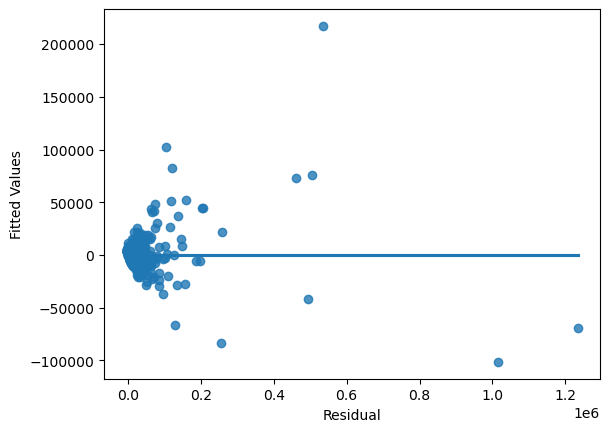

In [24]:
sns.regplot(x=results.fittedvalues, y=results.resid, ci=None)
plt.xlabel('Residual')
plt.ylabel('Fitted Values')
plt.show()

What the data, graphs, and analysis show is that that there is a linear relationship between the white population and the holc grade, black population, hispanic population, asian population, and other population in this sample. 

#### For Research Question 2

We would like to know if we have sufficient evidence to suggest that the slope that corresponds to race population and holc grade in the corresponding population model is non-zero in a model that predicts the population of white people based upon the holc grade, the black population, the asian population, the hispanic population, and the other population?

Is there sufficient evidence to suggest that the slope that corresponds to race population and holc grade in the corresponding population model is non-zero in a model that predicts the population of white people based upon the holc grade, the black population, the asian population, the hispanic population, and the other population?


 4.2 Hypotheses

Ho: βi = 0 (slope that corresponds to race of sorrounding area population in corresponding model is zero)

Ha: βi ≠ 0 (slope that corresponds to race of sorrounding area population in corresponding model is not equal to zero)

Hypothesis Testing 

alpha value = 0.1 

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              white_pop   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1972.
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:41:44   Log-Likelihood:                -6140.7
No. Observations:                 551   AIC:                         1.230e+04
Df Residuals:                     543   BIC:                         1.233e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5118.2003   1442.671      3.548      0.000    2284.301    7952.099
holc_grade[T.B]  1336.1154   2046.822      0.653      0.514   -2684.544    5356.775
holc_grade[T.C] -5527.6443   2095.929     -2.637      0.009   -9644.767   -1410.522
holc_grade[T.D] -9021.9655   2051.660     -4.397      0.000   -1.31e+04   -4991.804
black_pop           0.0875      0.033      2.614      0.009       0.022       0.153
hisp_pop            0.1205      0.018      6.706      0.000       0.085       0.156
asian_pop          -1.2930      0.079    -16.390      0.000      -1.448      -1.138
other_pop           8.2362      0.278     29.649      0.000       7.691       8.782
==============================================================================
Omnibus:                      575.572   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82318.455
Skew:                           4.290   Prob(JB):                         0.00
Kurtosis:                      62.262   Cond. No.                     5.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

For the variable holc_grade[T.B], the p value is 0.514  > $\alpha$ of 0.1 as such we fail to reject the null hypthesis as we don't have the evidence to suggest the slope could be non-zero. This shows that there is not enough evidence to suggest there is a linear association between the variable holc_grade[T.B] and the variable white_pop.

For the variable holc_grade[T.C], the p value is 0.009  < $\alpha$ of 0.1 as such we reject the null hypthesis as we have enough evidence to suggest the slope could be non-zero. This shows that there is enough evidence to suggest there is a linear association between the variable holc_grade[T.C] and the variable white_pop.

For the variable holc_grade[T.D], the p value is 0.000  < $\alpha$ of 0.1 as such we reject the null hypthesis as we have enough evidence to suggest the slope could be non-zero. This shows that there is enough evidence to suggest there is a linear association between the variable holc_grade[T.D] and the variable white_pop.

For the variable black_pop, the p value is 0.009  < $\alpha$ of 0.1 as such we reject the null hypthesis as we have enough evidence to suggest the slope could be non-zero. This shows that there is enough evidence to suggest there is a linear association between the variable black_pop and the variable white_pop.

For the variable hisp_pop, the p value is 0.000  < $\alpha$ of 0.1 as such we reject the null hypthesis as we have enough evidence to suggest the slope could be non-zero. This shows that there is enough evidence to suggest there is a linear association between the variable hisp_pop and the variable white_pop.

For the variable hisp_pop, the p value is 0.000  < $\alpha$ of 0.1 as such we reject the null hypthesis as we have enough evidence to suggest the slope could be non-zero. This shows that there is enough evidence to suggest there is a linear association between the variable hisp_pop and the variable white_pop.

For the variable asian_pop, the p value is 0.000  < $\alpha$ of 0.1 as such we reject the null hypthesis as we have enough evidence to suggest the slope could be non-zero. This shows that there is enough evidence to suggest there is a linear association between the variable asian_pop and the variable white_pop.

For the variable other_pop, the p value is 0.000  < $\alpha$ of 0.1 as such we reject the null hypthesis as we have enough evidence to suggest the slope could be non-zero. This shows that there is enough evidence to suggest there is a linear association between the variable other_pop and the variable white_pop.


Condition Checking

Since some of conditions of hypothesis testing in multiple linear regression are not met as shown below, we must proceed with caution when making conclusions. 

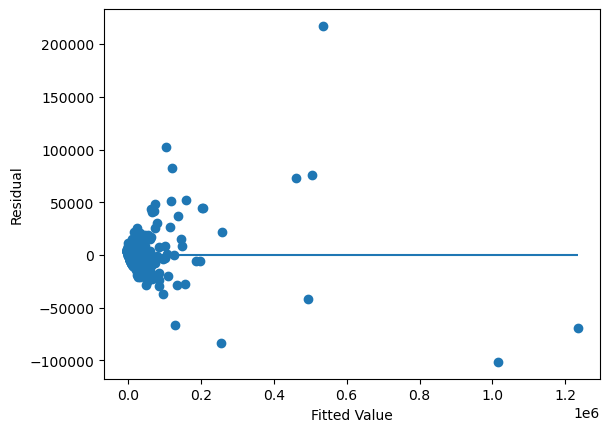

In [26]:
plt.scatter(results.fittedvalues, results.resid)
plt.hlines(y=0, xmin=np.min(results.fittedvalues), xmax=np.max(results.fittedvalues)) 
plt.ylabel('Residual')
plt.xlabel('Fitted Value')
plt.show()

Linearity condition is not met due to the number of residuals not being equaly distributed.
Constant variability of residuals condition is not met as the residuals are different in variance.


-2.074875985483509e-08

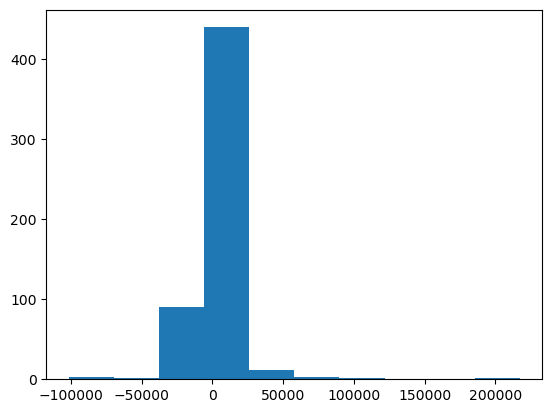

In [27]:
plt.hist(results.resid)
results.resid.mean()

Normality or residuals (with mean of 0) condition is not met because the distribution is not normal and the mean is not zero.
 Independence of residuals condition is not met because the data is not randomly sampled.


In [28]:
indices = ['white_pop', 'black_pop', 'hisp_pop', 'asian_pop', 'other_pop']
df[indices].corr()

,white_pop,black_pop,hisp_pop,asian_pop,other_pop
white_pop,1.000000,0.923678,0.870382,0.886690,0.965904
black_pop,0.923678,1.000000,0.840700,0.841861,0.919824
hisp_pop,0.870382,0.840700,1.000000,0.917567,0.904469
asian_pop,0.886690,0.841861,0.917567,1.000000,0.961247
other_pop,0.965904,0.919824,0.904469,0.961247,1.000000


No-Multicollinearity Condition is met as though there maybe some association between the variables non of the variables have a strong linear relationship.


Based on this analyses shown above, we have sufficient evidence to suggest a linear relationship between the white population and the holc grade, black population, hispanic population, asian population, and other population in the corresponding population model of ALL American metro areas. 

What this model suggest in general is that, with the white population, the strongest factor in predicting how many Caucasian people live in a metro area is the holc grade. In metro areas that have have a lower ranking/rating of C or D, there tends to be less white peple than in A or B rated areas. This suggests that there is evidence that the impacts of redlining still exist in the population distribution of modern American metro areas. 

## 5. Logistic Regression

Research Questions
1. What explanatory variables should we include in the model that predicts whether HOLC grading is good or bad to build a parsimonious model?
2. Is there a linear relationship between the log-odds of the success level of holc_grade(high or low based on  A-b range and c-d range) based on the white_pop, black_pop, hisp_pop, asian_pop, other_pop in the poppulation of all American Metro areas? 



#### For Research Question 1

What explanatory variables should we include in the model that predicts whether HOLC grading is good or bad to build a parsimonious model?

In [29]:
# creating the test and train split of 85% split 
split_df = df 
split_ratio = 0.85

train = split_df.sample(frac=split_ratio, random_state=200)
test = split_df.drop(train.index)

Backwards Selections Algorithm 

In [30]:
current_mod = smf.logit('y ~ white_pop +black_pop + hisp_pop + asian_pop + other_pop + surr_area_white_pop + surr_area_black_pop + surr_area_hisp_pop + surr_area_asian_pop + surr_area_other_pop + total_pop', data=df).fit()
print('ITERATION 1: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.563962
         Iterations 9
ITERATION 1: BIC of the Current Model 697.2274415144568


In [31]:
current_mod = smf.logit('y ~ white_pop +black_pop + hisp_pop + asian_pop + other_pop + surr_area_white_pop + surr_area_black_pop + surr_area_hisp_pop + surr_area_asian_pop + surr_area_other_pop ', data=df).fit()
print('ITERATION 2: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.563964
         Iterations 9
ITERATION 2: BIC of the Current Model 690.9170297782558


In [32]:
current_mod = smf.logit('y ~ white_pop +black_pop + hisp_pop + asian_pop + other_pop + total_pop', data=df).fit()
print('ITERATION 3: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.591047
         Iterations 9
ITERATION 3: BIC of the Current Model 695.5161681756581


In [33]:
current_mod = smf.logit('y ~ white_pop + black_pop + hisp_pop + asian_pop + other_pop', data=df).fit()
print('ITERATION 4: BIC of the Current Model',current_mod.bic)

Optimization terminated successfully.
         Current function value: 0.591048
         Iterations 9
ITERATION 4: BIC of the Current Model 689.204951551107


After the backwards selection algorithm, the best model is the one that predicts whether the HOLC grading is bad or good is one that considers the while populaiton, baclk population, hispanic population, asian population, and other population. This the parsimonious model. 

Final Model

In [34]:
model = smf.logit('y ~ white_pop +black_pop + hisp_pop + asian_pop + other_pop', data=train).fit()

Optimization terminated successfully.
         Current function value: 0.592087
         Iterations 9


In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  468
Model:                          Logit   Df Residuals:                      462
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1457
Time:                        14:41:45   Log-Likelihood:                -277.10
converged:                       True   LL-Null:                       -324.35
Covariance Type:            nonrobust   LLR p-value:                 7.553e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2487      0.125      1.997      0.046       0.005       0.493
white_pop      0.0001   1.86e-05      5.789      0.000    7.11e-05       0.000
black_pop  -2.006e-05   1.13e-05     -1.779      0.075   -4.22e-05    2.04e-06
hisp_pop   -1.901e-05   9.33e-06     -2.038      0.042   -3.73e-05   -7.26e-07
asian_pop      0.0002   3.59e-05      4.174      0.000    7.96e-05       0.000
other_pop     -0.0010      0.000     -5.242      0.000      -0.001      -0.001
==============================================================================
"""

$log(\frac{\hat{p}}{1-\hat{p}}) = 0.2487 + 0.0001*white.pop - (2.006e-05)*black.pop - (1.901e-05)*hisp.pop + 0.0002*asian.pop - 0.001*other.pop$ 

AUC and ROC Score 

In [36]:
fprs, tprs, thresholds = roc_curve(y_true=train['y'], y_score=model.fittedvalues)

In [37]:
auc = roc_auc_score(y_true=train['y'], y_score=model.fittedvalues)
auc

0.8057610462673753

In [38]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

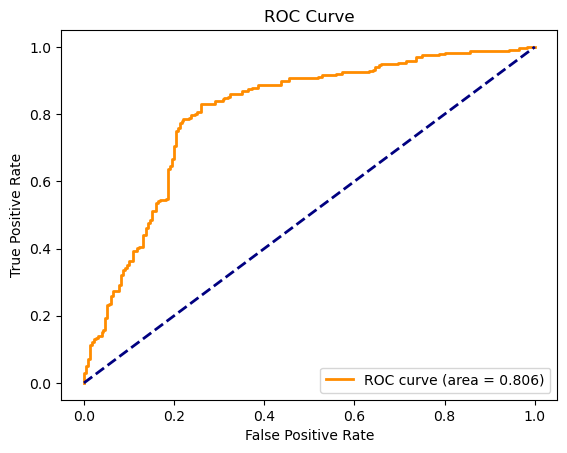

In [39]:
plot_roc(fprs, tprs, auc)

As we can see, this model does have a predictive probability threshold that will get us anywhere close to ideal (false positibe rate, true positive rate) of (0, 1). This is an indication that this model classifier will yield an accurate classification of the sample data. The AUC has a value of 0.806 which means that the model which is close to ideal value of 1. This means that this logistic regression model will have a higher performance in classifying whether the hold grading is good or bad based upon the population of ethnicities in metro areas. Together, this model is accurate and will have a good performance in its classifying task. 

This model represents a novice HOLC grader trained on their company data. From their perspective, they would rather give out more false negatives and classify more "good" neighborhoods as negatives. In the reverse situation where more negatives are classified as positives, there will be more neighborhood areas that have an A or B rating. Investors and people looking into buying homes may invest in areas with this 'good' rating when in actuallity it may have poor returns. If this happens, it may result in a decrese in reputability of the HOLC grading system. Therefore, a higher predictive probabilty threshold will be ideal for this model. In this situation, we will go with a predictive probability threshold of 0.4. 

In [40]:
pred = model.predict(exog=(test))
test['pred'] = pred

In [41]:
test['yhat'] = 1*(test['pred'] > 0.4)

In [42]:
tn, fp, fn, tp = confusion_matrix(y_true=test['y'], 
                                  y_pred=test['yhat']).ravel()
(tn, fp, fn, tp)

(13, 31, 4, 35)

In [43]:
sensitivity=tp/(tp+fn)
print('sensitivity:', sensitivity)

sensitivity: 0.8974358974358975


In [44]:
specificity=tn/(tn+fp)
print('specificity:', specificity)

specificity: 0.29545454545454547


The logistic regression model classifies a neighborhood as good or bad based upon the populuation of different ethnicities. It simulates a novice holc grader who is classifying a neighborhood as good or bad based upon the distribution of races. We found that the predictive probability threshold for this model that works best is 0.4. 

To answer the research question, the most representative model that classified the HOLC grade based on the population of ethnicities in a neighborhood included the white population, black population, hispanic population, asian population, and other population. 

#### For Research Question 2

Is there a linear relationship between the log-odds of the success level of holc_grade(high or low based on  A-b range and c-d range) based on the white_pop, black_pop, hisp_pop, asian_pop, other_pop in the poppulation of all American Metro areas? 

In [54]:
model = smf.logit('y ~ white_pop +black_pop + hisp_pop + asian_pop + other_pop', data=train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.592087
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  468
Model:                          Logit   Df Residuals:                      462
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1457
Time:                        14:42:05   Log-Likelihood:                -277.10
converged:                       True   LL-Null:                       -324.35
Covariance Type:            nonrobust   LLR p-value:                 7.553e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2487      0.125      1.997      0.046       0.005       0.493
white_pop      0.0001   1.86e-05      5.789      0.000    7.11e-05       0.000
black_pop  -2.006e-05   1.13e-05     -1.779      0.075   -4.22e-05    2.04e-06
hisp_pop   -1.901e-05   9.33e-06     -2.038      0.042   -3.73e-05   -7.26e-07
asian_pop      0.0002   3.59e-05      4.174      0.000    7.96e-05       0.000
other_pop     -0.0010      0.000     -5.242      0.000      -0.001      -0.001
==============================================================================
"""

Condition Checking for Hypothesis Testing for Logistic Regression Models

1. The sample is randomly selected from the population. However, the sample is larger than 10% of the population size
2. Since each of the curves, that show a numerical explanotory variable with the response variable, has a S-shape, the linearity condition has been met. 
3. The No Multi-collinearity condition is not met in this sample because a many of explanatory variables have a semi-strong linear relationship and correlation between each other. This can be seen in the pairplot and the correlation table below 

Since not all of the conditions for hypothesis testing have been met, we must proceed with caution when making conclusions from the tests. 

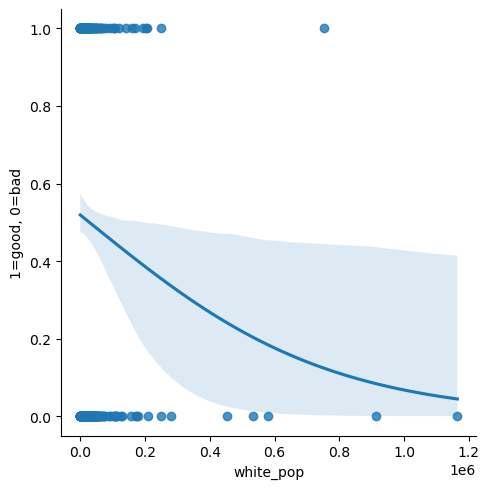

In [46]:
sns.lmplot(x="white_pop", y='y',data=df, logistic=True)
plt.ylabel('1=good, 0=bad')
plt.show()

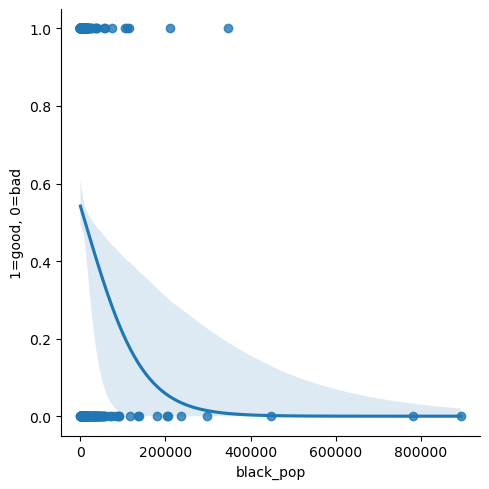

In [47]:
sns.lmplot(x="black_pop", y='y',data=df, logistic=True)
plt.ylabel('1=good, 0=bad')
plt.show()

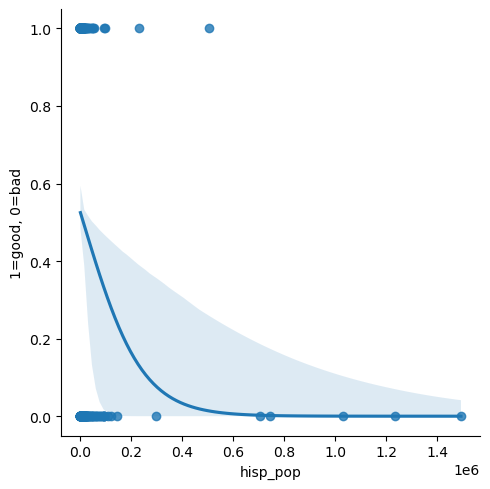

In [48]:
sns.lmplot(x="hisp_pop", y='y',data=df, logistic=True)
plt.ylabel('1=good, 0=bad')
plt.show()

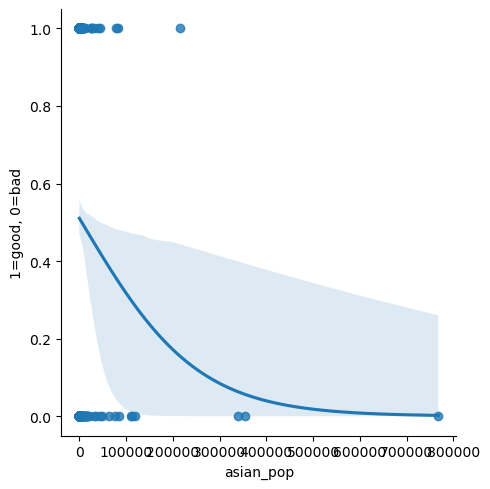

In [49]:
sns.lmplot(x="asian_pop", y='y',data=df, logistic=True)
plt.ylabel('1=good, 0=bad')
plt.show()

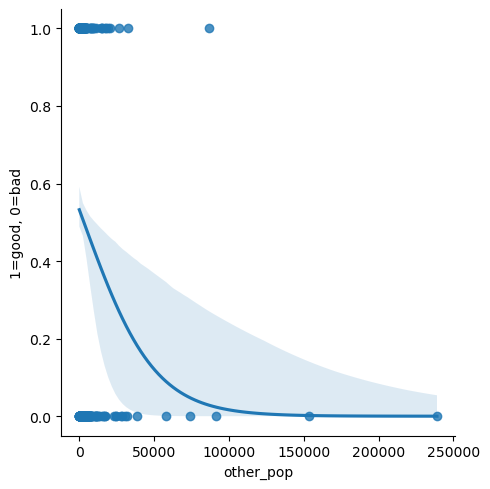

In [50]:
sns.lmplot(x="other_pop", y='y',data=df, logistic=True)
plt.ylabel('1=good, 0=bad')
plt.show()

/home/nicholas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nicholas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nicholas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nicholas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

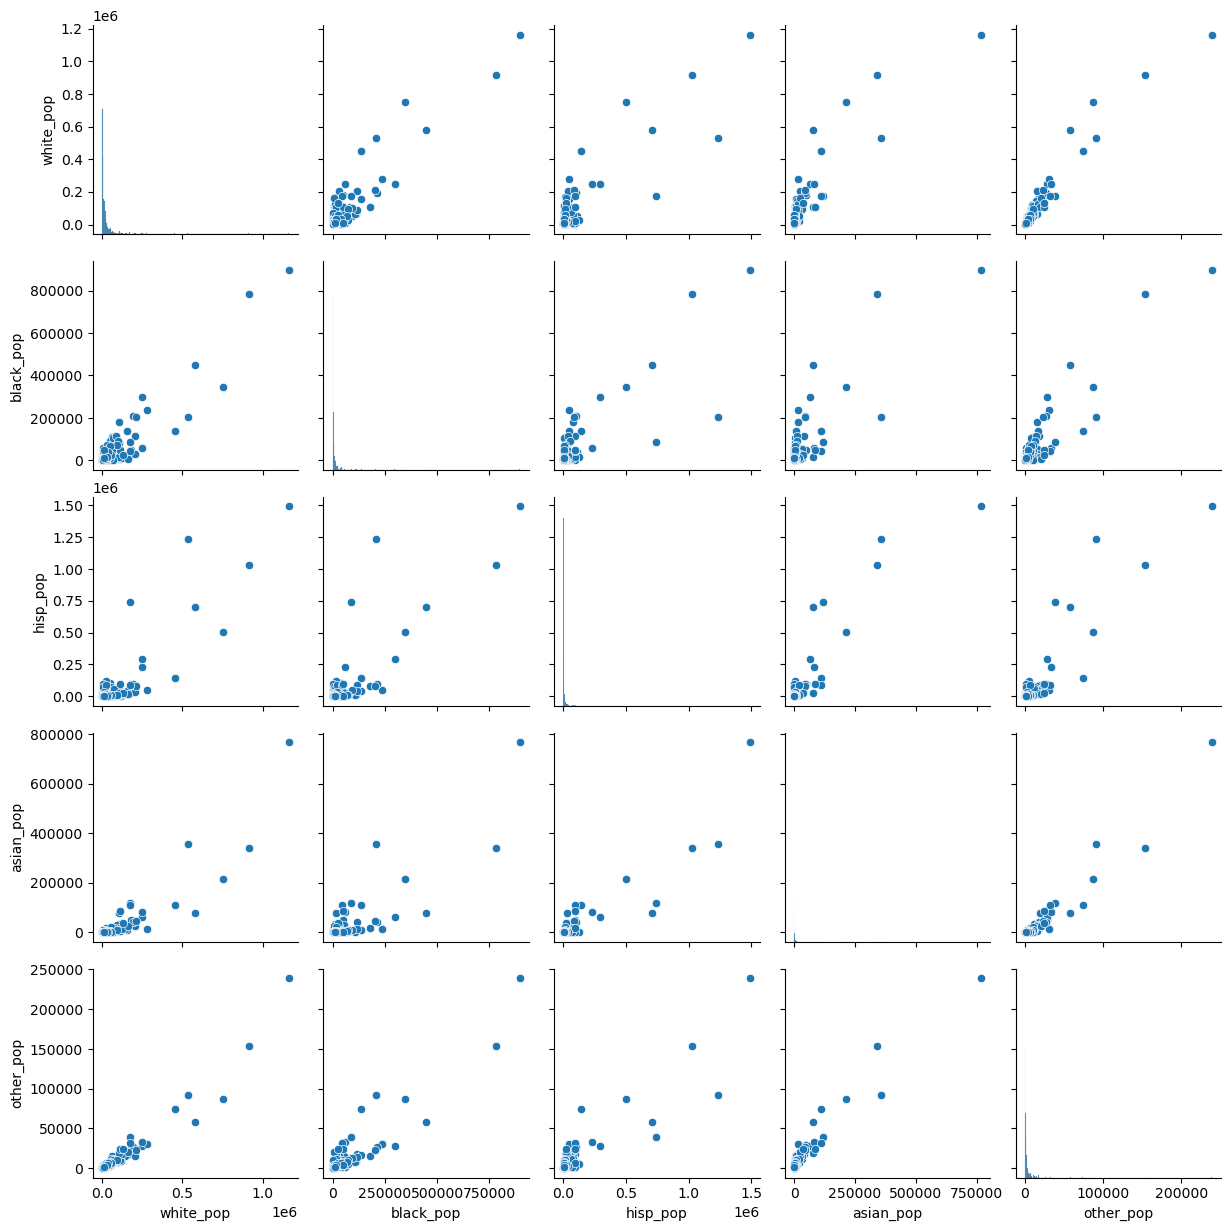

In [51]:
indices = ['white_pop', 'black_pop', 'hisp_pop', 'asian_pop', 'other_pop']
sns.pairplot(df[indices])

In [52]:
df[indices].corr()

,white_pop,black_pop,hisp_pop,asian_pop,other_pop
white_pop,1.000000,0.923678,0.870382,0.886690,0.965904
black_pop,0.923678,1.000000,0.840700,0.841861,0.919824
hisp_pop,0.870382,0.840700,1.000000,0.917567,0.904469
asian_pop,0.886690,0.841861,0.917567,1.000000,0.961247
other_pop,0.965904,0.919824,0.904469,0.961247,1.000000


Hypothesis Testing 


alpha value is 0.1

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  468
Model:                          Logit   Df Residuals:                      462
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Jan 2024   Pseudo R-squ.:                  0.1457
Time:                        14:42:05   Log-Likelihood:                -277.10
converged:                       True   LL-Null:                       -324.35
Covariance Type:            nonrobust   LLR p-value:                 7.553e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2487      0.125      1.997      0.046       0.005       0.493
white_pop      0.0001   1.86e-05      5.789      0.000    7.11e-05       0.000
black_pop  -2.006e-05   1.13e-05     -1.779      0.075   -4.22e-05    2.04e-06
hisp_pop   -1.901e-05   9.33e-06     -2.038      0.042   -3.73e-05   -7.26e-07
asian_pop      0.0002   3.59e-05      4.174      0.000    7.96e-05       0.000
other_pop     -0.0010      0.000     -5.242      0.000      -0.001      -0.001
==============================================================================
"""

Hypotheses

Ho: Beta = 0 (slopes for white_pop, black_pop, his_pop, asian_pop, and other_pop)

Ha: Beta != 0 (slopes for white_pop, black_pop, his_pop, asian_pop, and other_pop)

Conclusions 

white_pop: Since the p value (< 0.001) is less than the alpha value of 0.1, we reject the null hypothesis and say that there is sufficient evidence to suggest the alternative hypothesis. This means that the population slope for white_pop in the corresponding population model is non-zero.  

black_pop: Since the p value (0.075) is less than the alpha value of 0.1, we reject the null hypothesis and say that there is sufficient evidence to suggest the alternative hypothesis. This means that the population slope for black_pop in the corresponding population model is non-zero. 

hisp_pop: Since the p value (0.042) is less than the alpha value of 0.1, we reject the null hypothesis and say that there is sufficient evidence to suggest the alternative hypothesis. This means that the population slope for hisp_pop in the corresponding population model is non-zero. 

asian_pop: Since the p value (< 0.001) is less than the alpha value of 0.1, we reject the null hypothesis and say that there is sufficient evidence to suggest the alternative hypothesis. This means that the population slope for asian_pop in the corresponding population model is non-zero. 

other_pop: Since the p value (< 0.001) is less than the alpha value of 0.1, we reject the null hypothesis and say that there is sufficient evidence to suggest the alternative hypothesis. This means that the population slope for other_pop in the corresponding population model is non-zero. 

Because the slope for each of the populations passes the hypothesis testing and since there is enough evidence to suggest that the slopes corresponding are non-zero, it can be said that there is a linear relatonship between the success level of holc_grade based on the white_pop, black_pop, hisp_pop, asian_pop, other_pop in the poppulation of all American Metro areas.

*we do not recommend using this classifier in actuallity*

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes in their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

A question I would like to investigate is how does holc grading influence native american proportions within an area and does HOLC grading affect native american proportions in surrounding areas?

A  follow up to the inference section would be the relationship between HOLC grades and different ethnicity proportions in surrounding areas

## 6. Conclusion

1. Summarization: You should summarize the findings of each of your individual research 
questions here in your conclusion and discuss how your findings relate back to your 
overarching motivation. (At least a paragraph here).

Begining with the descriptive section, it would seem that from the cities we selected from the larger regions in the U.S., HOLC grades seem to be associated with demographic proportions. From the findings of the inference section, there seems to be an association with the percentage of white people in a metro area and the grade given. Although there seems to be no association with the percentage of white people in the surrounding area of a metro area and the grade given. This assocation could suggest that the impact of redlining is present as the HOLC grades were given in the past and based on the inference section, it would seem that the difference between percentage of white people living in a metro area graded as "good" and percentage of white people living in a metro area graded as "bad" is not zero which is definitely interesting. Findings from the linear regression section, we found that the variables that have a linear association with the population of white people within a metro area are the variables representing any other ethnicity. Furthermore, the only HOLC grades that were found to have a linear association with the population of white people within a metro area are grades C and D. This all seems to suggest that though the HOLC grades were given long ago, their existence may have impacted the present ethnicity proportions within the average metro area. Using the data, we trained a logistic regression model to better understand the strength of the associations found by the inference and linear regression. What we found was that ethnicity data were very strong predictors for HOLC grades given and as such this further strengthen our claim about the association between HOLC gradings and demographic proportions. Ultimately our goal is find associations between HOLC gradings and demographic proportions in order to begin to understand the lasting impact of redlining. Although our research is not able to assert a causal relationship with HOLC gradings and current demographic proportions, based on evidence from the inference we conducted ,the linear regression model and logistic regression model built we can say that there is a strong association between the HOLC gradings and demographic proportions. Thus we believe that this research provides the evidence that greater efforts should be put towards investigating the lasting impact of redlining.


2. Future Work: 
a. Finally, if you (or someone else) were to conduct future work based on these 
analyses, what kind of research questions or analyses might that entail? 
b. Also, discuss any shortcomings that you might be aware of when it comes to your 
analysis. (Almost analyses have some inevitable shortcoming). Is there any part of 
your analysis/data/decisions that may impact the confidence that you have in the 
answers to your research questions? (No analyses are 100% perfect!)

Going forward, we plan on performing a deeper analysis into the effects of redlining and other discriminatory practices that has happened historically in the US.  We want to identify other discriminatory practices that has happened in the past and anaylze how it has impacted the current America, ranging from economically to the distribution of wealth across people in the US. We hope to make broaden our classifier model and linear regression model to include more parameters aside from current ethnic and racial demographic data. We want it to include financial, economic, and social parameters that will make the classification task more accurate and representative. We also hope to expand the scope of the investigation. Another of our Future goals we have is to create a classifier that identifies whether a nieghborhood or region has been historically redlined. One of the shortcomings that we encountered during this study was the format of the dataset. The dataset is an aggregation of neighborhoods that have been redlined in the past. While this is useful when analyzing specific redlined areas, it prevents us from making deeper conclusion that may come from a dataset that includes areas that have not been redlined. Investigating the differences between redlined metro areas and metro areas that have not been redlined, will provide even deeper insight into how redlining has affect the ethnic and racial distribution of people in American metros.

